<a href="https://colab.research.google.com/github/CE0-MOEK/CE0-MOEK/blob/main/RL_basic_algorithm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [26]:
import numpy as np
import random
import matplotlib.pyplot as plt
import pandas as pd
import io
dff = '/content/state_transitions.csv'
#df = pd.read_csv(io.BytesIO(uploaded['state_transition.csv']))
#print(df)

In [27]:
rewards = np.zeros(16)
rewards[3]=1
rewards[2]=0
rewards[11]=0
rewards[10]=0

terminal_state = 3
state_values = np.zeros(16)
score_log=[]

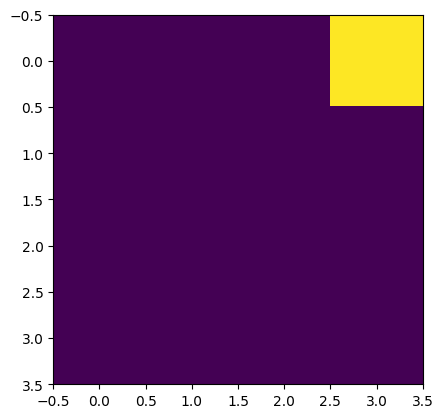

In [28]:
plt.imshow(rewards.reshape(4,4))

In [29]:
state_transistion_table = np.genfromtxt(dff, delimiter=",").astype(int)

In [30]:
def returns(values, rewards, states):  # this propagates the reward to the current state
  state_count = np.zeros(16)
  state_returns = np.zeros(16)
  r=0
  gamma = 0.9
  for i in reversed(range(len(rewards))):
    r = rewards[i] + gamma*r
    state_returns[states[i]] += r
    state_count[states[i]] += 1
    #print(states[i])

  return state_returns/(state_count + 1e-4)


In [31]:
def test_agent():
  state = 12
  done = False
  steps = 0
  total_rewards = 0
  states_log =  []
  while (not(state == terminal_state)) and steps<40:
    states_log.append(state)
    action = np.argmax(state_values[state_transistion_table[state]])
    state = state_transistion_table[state, action]
    total_rewards += rewards[state]
    steps +=1
  states_log.append(state)
  return total_rewards,states_log


In [32]:
returns_log = []
for _ in range(1000):
  state = 12
  state_log = []
  reward_log = []
  steps = 0

  while (not(state == terminal_state)) and steps<40:
    reward_log.append(rewards[state])
    state_log.append(state)

    action = random.randint(0,3)
    state = state_transistion_table[state, action]
    steps +=1

  reward_log.append(rewards[state])
  state_log.append(state)
  returns_log.append(returns(state_values, reward_log, state_log))
  state_values = np.mean(returns_log, 0)

  score_log.append(test_agent()[0])


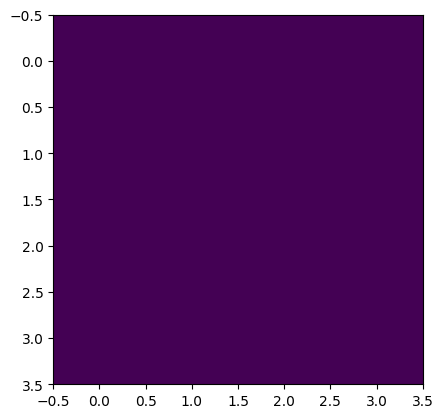

In [33]:
plt.imshow(returns_log[0].reshape(4,4))

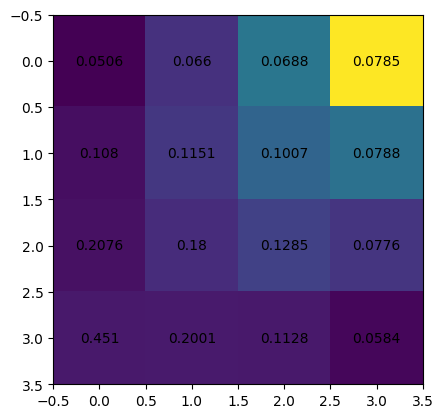

In [34]:
fig1, ax1 = plt.subplots(1)
ax1.imshow(state_values.reshape(4,4))

for (i,j), label in np.ndenumerate(state_values.reshape(4,4).round(4)):
  ax1.text(i,j,label, ha='center', va='center')


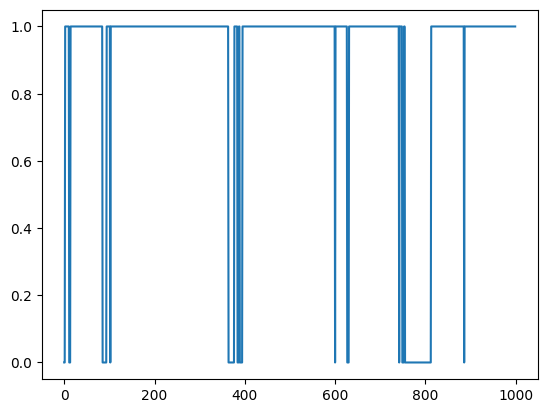

In [35]:
plt.plot(score_log)

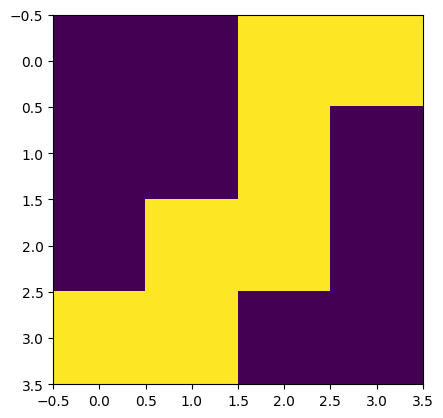

In [36]:
_, state_log = test_agent()
state_view =np.zeros(16)
state_view[state_log]=1
plt.imshow(state_view.reshape(4,4))